In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
iris =datasets.load_iris()
features = iris.data
target =iris.target

In [4]:
target_names =iris.target_names
labels =target_names[target]

In [8]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [11]:
setosa_petal_length=features[labels=='setosa',2]
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width]
versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

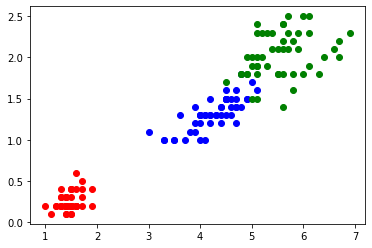

In [12]:
plt.scatter(setosa[:,0],setosa[:,1],color ='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [14]:
training_data=np.r_[setosa,versicolor,virginica]
training_labels =np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

In [16]:
#建立模型
clf =svm.LinearSVC()
clf.fit(training_data,training_labels)


LinearSVC()

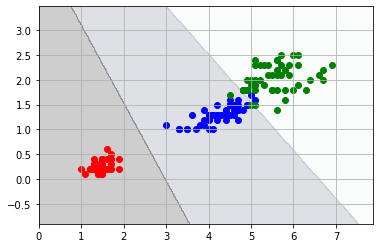

In [38]:
#為了要使得白色部分可以被預測，所以將最大最小都涵蓋進入
training_x_min=training_data[: ,0].min()-1
training_x_max=training_data[: ,0].max()+1
training_y_min=training_data[: ,1].min()-1
training_y_max=training_data[: ,1].max()+1
grid_interval=0.02 #切割成小格小格
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
#做預測
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(setosa[: ,0],setosa[: ,1], color ='red')
plt.scatter(versicolor[: ,0], versicolor[: ,1],color='blue')
plt.scatter(virginica[:,0],virginica[: ,1],color='green')
plt.show()

In [52]:
def SVM_plot(clf,title):
        training_x_min=training_data[: ,0].min()-1
        training_x_max=training_data[: ,0].max()+1
        training_y_min=training_data[: ,1].min()-1
        training_y_max=training_data[: ,1].max()+1
        grid_interval=0.02 #切割成小格小格
        xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
#做預測
        z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
        z=z.reshape(xx.shape)
        plt.contourf(xx,yy,z,cmap=plt.cm.bone,alpha=0.2)
        plt.autoscale()
        plt.grid()
        plt.scatter(setosa[: ,0],setosa[: ,1], color ='red')
        plt.scatter(versicolor[: ,0], versicolor[: ,1],color='blue')
        plt.scatter(virginica[:,0],virginica[: ,1],color='green')
        plt.show()
        


In [59]:
def SVM_plot(clf,title):
        training_x_min=training_data[:,0].min()-1
        training_x_max=training_data[:,0].max()+1
        training_y_min=training_data[:,1].min()-1
        training_y_max=training_data[:,1].max()+1
        grid_interval=0.02
        xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
        Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
        Z=Z.reshape(xx.shape)
        plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
        plt.autoscale()
        plt.grid()
        plt.scatter(setosa[:,0],setosa[:,1],color='red')
        plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
        plt.scatter(virginica[:,0],virginica[:,1],color='green')
        plt.title(title)
        plt.show()

In [60]:
#重要參數
#C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。
#gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')
#kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等

clf=svm.SVC(kernel='linear')
clf.fit(training_data,training_labels)
SVM_plot=(clf,'Linear')
跑不出圖qq

In [61]:
#換新特徵
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]
versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]
virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

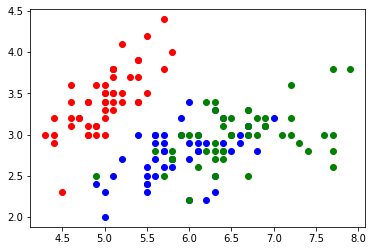

In [62]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [63]:
training_data=np.r_[setosa,versicolor,virginica]
training_labels =np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

In [64]:
clf=svm.SVC(kernel='linear',C =1,degree =5)
clf.fit(training_data,training_labels)
SVM_plot=(clf,'Linear')

In [65]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [67]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

In [68]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [69]:

print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777
